In [16]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from tqdm.autonotebook import tqdm

In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
sku_data = pd.read_csv('HW_6_data_new.csv')
test_df = pd.read_csv('HW_6_test_new.csv')

In [4]:
sku_data

,dates,SKU,price_per_sku
0,2019-03-11,11617,182.0
1,2019-03-12,11617,182.0
2,2019-03-13,11617,182.0
3,2019-03-15,11617,182.0
4,2019-03-17,11617,182.0
...,...,...,...
3237,2019-11-26,98130,327.0
3238,2019-11-27,98130,327.0
3239,2019-11-28,98130,327.0
3240,2019-11-29,98130,327.0


In [5]:
sku_data.SKU.value_counts()

29251    495
40937    428
50971    365
75536    361
97818    333
67286    299
98130    281
39924    275
67179    225
11617    180
Name: SKU, dtype: int64

In [6]:
sku_data.dates = pd.to_datetime(sku_data.dates)
test_df.dates = pd.to_datetime(test_df.dates)

In [115]:
pivot_t = sku_data.pivot_table(index='dates',columns='SKU', values='price_per_sku')

In [116]:
pivot_t

SKU,11617,29251,39924,40937,50971,67179,67286,75536,97818,98130
dates,,,,,,,,,,
2018-02-11,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-13,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-15,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-16,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-03,NaN,NaN,NaN,NaN,NaN,259.0,NaN,NaN,NaN,NaN
2019-12-04,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-05,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


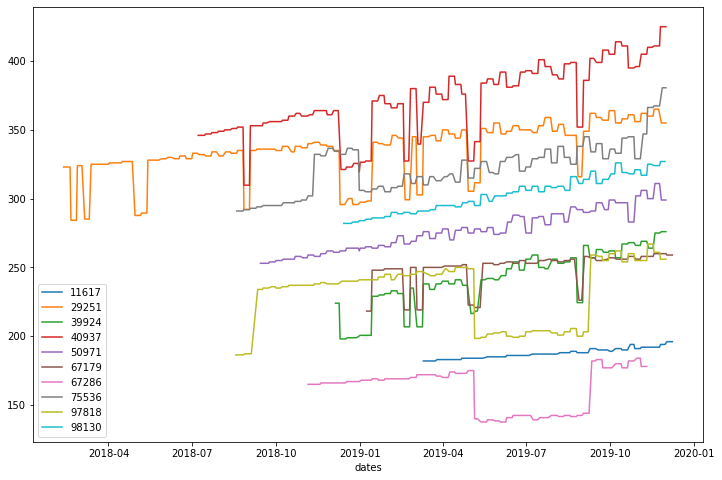

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(data = pivot_t, dashes=False)

In [117]:
for col in pivot_t.columns:
    pivot_t.loc[:,col] = pivot_t.loc[:,col].ffill()

In [119]:
pivot_t.reindex(columns=[i for i in pivot_t.columns]) 

SKU,11617,29251,39924,40937,50971,67179,67286,75536,97818,98130
dates,,,,,,,,,,
2018-02-11,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-13,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-15,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-16,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-03,196.0,355.0,276.0,425.0,299.0,259.0,178.0,380.6,256.0,327.0
2019-12-04,196.0,355.0,276.0,425.0,299.0,259.0,178.0,380.6,256.0,327.0
2019-12-05,196.0,355.0,276.0,425.0,299.0,259.0,178.0,380.6,256.0,327.0


In [228]:
sku_data.groupby('SKU')['dates'].agg(['max','min']).reset_index()

,SKU,max,min
0,11617,2019-12-08,2019-03-11
1,29251,2019-12-01,2018-02-11
2,39924,2019-12-01,2018-12-05
3,40937,2019-12-01,2018-07-08
4,50971,2019-12-01,2018-09-14
5,67179,2019-12-08,2019-01-08
6,67286,2019-11-10,2018-11-05
7,75536,2019-12-01,2018-08-19
8,97818,2019-12-01,2018-08-18
9,98130,2019-11-30,2018-12-14


In [121]:
data_part = sku_data.groupby('SKU')['dates'].agg(['max','min']).reset_index()

In [122]:
print(data_part['max'].min(), data_part['min'].max())

2019-11-10 00:00:00 2019-03-11 00:00:00


In [123]:
pivot_t.loc[pd.to_datetime('2019-03-11'):pd.to_datetime('2019-11-10')]

SKU,11617,29251,39924,40937,50971,67179,67286,75536,97818,98130
dates,,,,,,,,,,
2019-03-11,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
2019-03-12,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
2019-03-13,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
2019-03-14,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
2019-03-15,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
...,...,...,...,...,...,...,...,...,...,...
2019-11-06,192.0,362.0,269.0,405.0,306.0,258.0,178.0,347.0,255.0,317.0
2019-11-07,192.0,362.0,269.0,405.0,306.0,258.0,178.0,347.0,255.0,317.0
2019-11-08,192.0,362.0,269.0,405.0,306.0,258.0,178.0,347.0,255.0,317.0


In [124]:
to_clustering = pivot_t.loc[pd.to_datetime('2019-03-11'):pd.to_datetime('2019-11-10')]

In [135]:
to_clustering.columns = [i for i in to_clustering.columns]

## TS_clustering

In [55]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [144]:
to_clustering

,11617,29251,39924,40937,50971,67179,67286,75536,97818,98130
dates,,,,,,,,,,
2019-03-11,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
2019-03-12,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
2019-03-13,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
2019-03-14,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
2019-03-15,182.0,345.0,238.0,370.0,276.0,250.0,172.0,310.0,247.0,291.0
...,...,...,...,...,...,...,...,...,...,...
2019-11-06,192.0,362.0,269.0,405.0,306.0,258.0,178.0,347.0,255.0,317.0
2019-11-07,192.0,362.0,269.0,405.0,306.0,258.0,178.0,347.0,255.0,317.0
2019-11-08,192.0,362.0,269.0,405.0,306.0,258.0,178.0,347.0,255.0,317.0


In [145]:
scaler = StandardScaler()
ts_scaled = scaler.fit_transform(to_clustering).T

In [146]:
ts_scaled.shape

(10, 245)

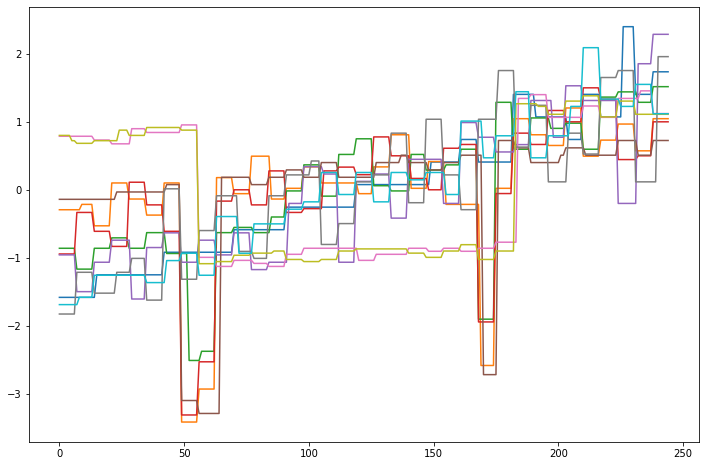

In [148]:
plt.figure(figsize=(12,8))
plt.plot(ts_scaled.T)

In [149]:
ts_scaled.shape

(10, 245)

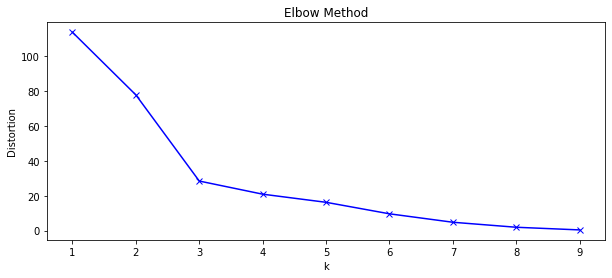

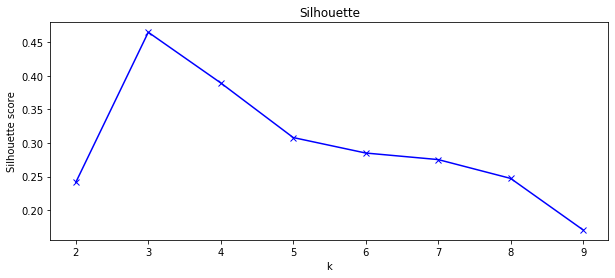

In [189]:
distortions = []
silhouette = []
K = range(1, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=50)
    kmeanModel.fit(ts_scaled)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(ts_scaled, kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

In [172]:
n_clusters = 3
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=3, max_iter=10)
ts_kmeans.fit(ts_scaled)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=10,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=3, n_init=1, n_jobs=3,
                 random_state=None, tol=1e-06, verbose=0)

In [214]:
ts_kmeans.predict(ts_scaled)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 10 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


array([0, 1, 1, 1, 0, 1, 2, 0, 2, 0])

In [229]:
z = dict()
for cluster, sku in zip(ts_kmeans.predict(ts_scaled),to_clustering.columns):
    if z.get(str(cluster)) is None:
        z[str(cluster)] = [sku]
    else:
        z[str(cluster)] = z[str(cluster)] + [sku]

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 10 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [230]:
z

{'0': [11617, 50971, 75536, 98130],
 '1': [29251, 39924, 40937, 67179],
 '2': [67286, 97818]}

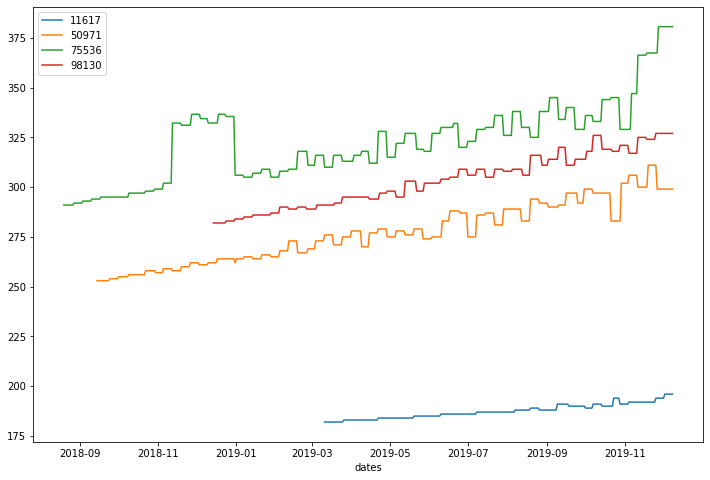

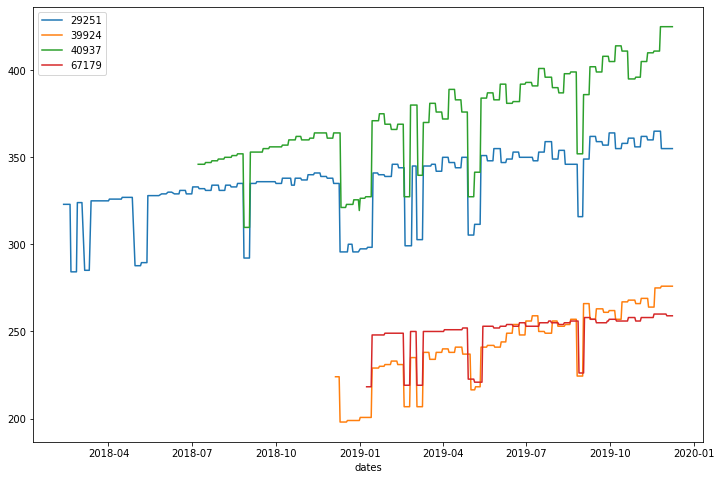

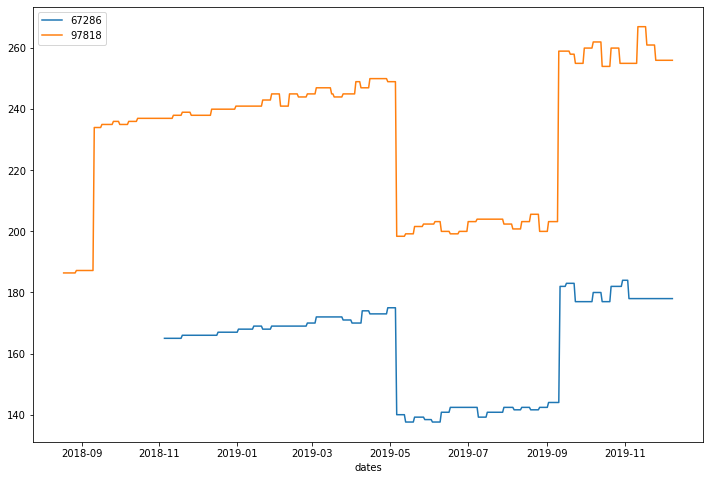

In [227]:
for cluster in z.keys():
    
    plt.figure(figsize=(12,8))
    sns.lineplot(data = pivot_t[z[cluster]], dashes=False)

In [ ]:
40937, 29251, 67179, 39924
97818, 67286
75536

# Predictions

In [9]:
prediction_dict = {}
for sku in sku_data.SKU.unique():
    print('SKU: ',sku)
    prophet = Prophet()
    train_data = sku_data[sku_data.SKU ==sku].reset_index(drop=True)
    train_data.price_per_sku = train_data.price_per_sku.ffill()
    prophet.fit(train_data[['dates', 'price_per_sku']].rename(columns={'dates':'ds','price_per_sku':'y'}))
    pred_df = prophet.predict(test_df[test_df.SKU ==sku][['dates']].rename(columns={'dates':'ds'}))
    pred_df.to_csv('prophet_predictions_{}.csv'.format(sku), index=None)

SKU:  11617


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  29251


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  39924


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  40937


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  50971


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  67179


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  67286


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  75536


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  97818


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU:  98130


In [7]:
df=pd.read_csv('prophet_predictions_11617.csv')

In [8]:
df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-11,194.764333,193.805247,195.651369,194.763213,194.766992,0.004572,0.004572,0.004572,0.004572,0.004572,0.004572,0.0,0.0,0.0,194.768905
1,2019-12-16,195.109941,194.321470,196.186414,195.072064,195.147031,0.145056,0.145056,0.145056,0.145056,0.145056,0.145056,0.0,0.0,0.0,195.254997
2,2019-12-23,195.593792,194.744393,196.675998,195.474938,195.710206,0.145056,0.145056,0.145056,0.145056,0.145056,0.145056,0.0,0.0,0.0,195.738848
3,2019-12-30,196.077644,195.221685,197.144959,195.856469,196.318396,0.145056,0.145056,0.145056,0.145056,0.145056,0.145056,0.0,0.0,0.0,196.222700


In [5]:
predictions = pd.DataFrame()
for sku in sku_data.SKU.unique():
    df = pd.read_csv('./prophet_predictions_{}.csv'.format(sku))
    df['SKU'] = sku
    df = df[['ds','SKU','yhat', 'yhat_lower', 'yhat_upper']].rename(
        columns={
            'yhat_lower':'predicted_lower_bound'
            ,'yhat_upper':'predicted_upper_bound'
            , 'ds':'dates'
        })
    predictions = pd.concat([df,predictions])

In [6]:
predictions

,dates,SKU,yhat,predicted_lower_bound,predicted_upper_bound
0,2019-12-02,98130,325.897211,323.009817,328.766372
1,2019-12-09,98130,326.828843,323.841274,329.746989
2,2019-12-17,98130,327.818198,324.897920,330.675684
3,2019-12-23,98130,328.692107,325.785700,331.634171
0,2019-12-02,97818,274.869567,260.897424,288.523655
1,2019-12-12,97818,283.361531,269.378224,297.378484
2,2019-12-17,97818,283.639607,268.911900,296.479423
3,2019-12-23,97818,287.069379,273.178105,302.101006
0,2019-12-03,75536,362.674415,353.098863,372.152739
1,2019-12-10,75536,365.013659,355.620103,374.880414


# METRIC IOU

<img src="1.png" width="600">
<img src="2.png" width="600">
<img src="3.png" width="600">
<img src="4.png" width="600">
<img src="5.png" width="600">
<img src="6.png" width="600">

In [12]:
answers = pd.read_csv('Answer_2_test_new_old.csv')

In [14]:
def calculate_intersection(lower_bound, upper_bound, predicted_lower_bound, predicted_upper_bound):
    intersection = 0
    if upper_bound < predicted_lower_bound or lower_bound > predicted_upper_bound :
        intersection = 0
    elif lower_bound <= predicted_lower_bound : 
        if upper_bound <= predicted_upper_bound:
            intersection = upper_bound - predicted_lower_bound
        elif upper_bound > predicted_upper_bound:
            intersection = predicted_upper_bound - predicted_lower_bound
    elif lower_bound > predicted_lower_bound:
        if upper_bound >= predicted_upper_bound:
            intersection = predicted_upper_bound - lower_bound
        elif upper_bound < predicted_upper_bound:
            intersection = upper_bound - lower_bound
    return intersection

In [15]:
def calculate_union(lower_bound, upper_bound, predicted_lower_bound, predicted_upper_bound):
    min_ = np.min([lower_bound, upper_bound, predicted_lower_bound, predicted_upper_bound])
    max_ = np.max([lower_bound, upper_bound, predicted_lower_bound, predicted_upper_bound])
    return max_ - min_

In [16]:
answers = answers.merge(predictions, how='left', on=['SKU', 'dates'])

In [18]:
answers['intersection'] = answers.apply(lambda x: calculate_intersection(x.lower_bound, x.upper_bound
                                               , x.predicted_lower_bound, x.predicted_upper_bound), axis=1)
answers['union'] = answers.apply(lambda x: calculate_union(x.lower_bound, x.upper_bound
                                               , x.predicted_lower_bound, x.predicted_upper_bound), axis=1)

answers['iou'] = answers.intersection / answers.union

In [19]:
answers.iou.mean()

0.1667498559678683

In [33]:
sku_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dates          3242 non-null   datetime64[ns]
 1   SKU            3242 non-null   int64         
 2   price_per_sku  3242 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 76.1 KB


In [34]:
sku_data

,dates,SKU,price_per_sku
0,2019-03-11,11617,182.0
1,2019-03-12,11617,182.0
2,2019-03-13,11617,182.0
3,2019-03-15,11617,182.0
4,2019-03-17,11617,182.0
...,...,...,...
3237,2019-11-26,98130,327.0
3238,2019-11-27,98130,327.0
3239,2019-11-28,98130,327.0
3240,2019-11-29,98130,327.0


In [35]:
sku_data['week_num'] = sku_data.dates.dt.isocalendar().week
sku_data['year'] = sku_data.dates.dt.year

In [36]:
sku_data_agg = sku_data.groupby(['SKU', 'year', 'week_num']).price_per_sku.mean().reset_index()

In [40]:
sku_data_agg = sku_data_agg.sort_values(['SKU','year','week_num'])

In [43]:
sku_data_agg['prev_price'] = sku_data_agg.groupby('SKU').price_per_sku.shift(1)

In [80]:
sku_data_agg

,SKU,year,week_num,price_per_sku,prev_price,dif_per
0,11617,2019,11,182.0,NaN,NaN
1,11617,2019,12,182.0,182.0,0.000000
2,11617,2019,13,183.0,182.0,0.005495
3,11617,2019,14,183.0,183.0,0.000000
4,11617,2019,15,183.0,183.0,0.000000
...,...,...,...,...,...,...
614,98130,2019,44,321.0,318.0,0.009434
615,98130,2019,45,317.0,321.0,-0.012461
616,98130,2019,46,325.0,317.0,0.025237
617,98130,2019,47,324.0,325.0,-0.003077


In [45]:
sku_data_agg['dif_per'] = (sku_data_agg.price_per_sku - sku_data_agg.prev_price)/sku_data_agg.prev_price

In [49]:
sku_data_agg.dif_per.describe()

count    609.000000
mean       0.003571
std        0.046113
min       -0.226556
25%       -0.005571
50%        0.002817
75%        0.010204
max        0.274606
Name: dif_per, dtype: float64

In [63]:
sku_data_agg[sku_data_agg.SKU.isin([40937, 29251, 67179, 39924])].dif_per.describe()

count    267.000000
mean       0.004750
std        0.056597
min       -0.130233
25%       -0.007648
50%        0.002778
75%        0.011590
max        0.185383
Name: dif_per, dtype: float64

In [82]:
predictions[['dates', 'SKU', 'yhat', 'predicted_lower_bound',
       'predicted_upper_bound']]

,dates,SKU,yhat,predicted_lower_bound,predicted_upper_bound
0,2019-12-02,98130,325.897211,323.009817,328.766372
1,2019-12-09,98130,326.828843,323.841274,329.746989
2,2019-12-17,98130,327.818198,324.897920,330.675684
3,2019-12-23,98130,328.692107,325.785700,331.634171
0,2019-12-02,97818,274.869567,260.897424,288.523655
1,2019-12-12,97818,283.361531,269.378224,297.378484
2,2019-12-17,97818,283.639607,268.911900,296.479423
3,2019-12-23,97818,287.069379,273.178105,302.101006
0,2019-12-03,75536,362.674415,353.098863,372.152739
1,2019-12-10,75536,365.013659,355.620103,374.880414


In [55]:
sku_data_agg[(sku_data_agg.SKU.isin([40937, 29251, 67179, 39924])) & (sku_data_agg.dif_per < -0.07)]

,SKU,year,week_num,price_per_sku,prev_price,dif_per
42,29251,2018,8,284.24,323.0,-0.120000
44,29251,2018,10,285.12,324.0,-0.120000
52,29251,2018,18,287.76,327.0,-0.120000
69,29251,2018,35,292.16,335.0,-0.127881
84,29251,2018,50,295.68,335.0,-0.117373
94,29251,2019,8,299.20,344.0,-0.130233
96,29251,2019,10,302.72,345.0,-0.122551
104,29251,2019,18,305.36,350.0,-0.127543
121,29251,2019,35,315.92,346.0,-0.086936
136,39924,2018,50,198.00,224.0,-0.116071


In [56]:
predictions

,dates,SKU,yhat,predicted_lower_bound,predicted_upper_bound
0,2019-12-02,98130,325.897211,323.009817,328.766372
1,2019-12-09,98130,326.828843,323.841274,329.746989
2,2019-12-17,98130,327.818198,324.897920,330.675684
3,2019-12-23,98130,328.692107,325.785700,331.634171
0,2019-12-02,97818,274.869567,260.897424,288.523655
1,2019-12-12,97818,283.361531,269.378224,297.378484
2,2019-12-17,97818,283.639607,268.911900,296.479423
3,2019-12-23,97818,287.069379,273.178105,302.101006
0,2019-12-03,75536,362.674415,353.098863,372.152739
1,2019-12-10,75536,365.013659,355.620103,374.880414


In [61]:
predictions['week_num'] = pd.to_datetime(predictions.dates).dt.isocalendar().week

In [73]:
def correction_LB(row):
    if (row.SKU in [40937, 29251, 67179, 39924]) & (row.week_num in [50,51,52]):
        row.predicted_lower_bound = row.predicted_lower_bound - (row.yhat * 0.13)
    else:
        row.predicted_lower_bound  = row.predicted_lower_bound
    return row.predicted_lower_bound

def correction_UB(row):
    if (row.SKU in [40937, 29251, 67179, 39924]) & (row.week_num in [50,51,52]):
        row.predicted_upper_bound = row.predicted_upper_bound - (row.yhat * 0.13)
    else:
        row.predicted_upper_bound  = row.predicted_upper_bound
    return row.predicted_upper_bound

In [74]:
predictions['corrected_lower_bound'] = predictions.apply(correction_LB, axis=1)
predictions['corrected_upper_bound'] = predictions.apply(correction_UB, axis=1)

In [83]:
predictions

,dates,SKU,yhat,predicted_lower_bound,predicted_upper_bound,week_num,corrected_lower_bound,corrected_upper_bound
0,2019-12-02,98130,325.897211,323.009817,328.766372,49,323.009817,328.766372
1,2019-12-09,98130,326.828843,323.841274,329.746989,50,323.841274,329.746989
2,2019-12-17,98130,327.818198,324.897920,330.675684,51,324.897920,330.675684
3,2019-12-23,98130,328.692107,325.785700,331.634171,52,325.785700,331.634171
0,2019-12-02,97818,274.869567,260.897424,288.523655,49,260.897424,288.523655
1,2019-12-12,97818,283.361531,269.378224,297.378484,50,269.378224,297.378484
2,2019-12-17,97818,283.639607,268.911900,296.479423,51,268.911900,296.479423
3,2019-12-23,97818,287.069379,273.178105,302.101006,52,273.178105,302.101006
0,2019-12-03,75536,362.674415,353.098863,372.152739,49,353.098863,372.152739
1,2019-12-10,75536,365.013659,355.620103,374.880414,50,355.620103,374.880414


In [ ]:
answers

In [76]:
answers = pd.read_csv('Answer_2_test_new_old.csv')

In [77]:
answers = answers.merge(predictions, how='left', on=['SKU', 'dates'])

In [78]:
answers['intersection'] = answers.apply(lambda x: calculate_intersection(x.lower_bound, x.upper_bound
                                               , x.corrected_lower_bound, x.corrected_upper_bound), axis=1)
answers['union'] = answers.apply(lambda x: calculate_union(x.lower_bound, x.upper_bound
                                               , x.corrected_lower_bound, x.corrected_upper_bound), axis=1)

answers['iou'] = answers.intersection / answers.union

In [79]:
answers.iou.mean()

0.39175115740903904

## Additional papers

https://github.com/fabsig/GPBoost

https://paperswithcode.com/task/time-series-clustering

https://www.youtube.com/watch?v=ShbWTtOyobE

https://retailhero.ai/video 

https://www.youtube.com/watch?v=TEzx4C1VHSc 